AUC score: 0.938
95% Confidence interval for the AUC score: [0.903, 0.967]


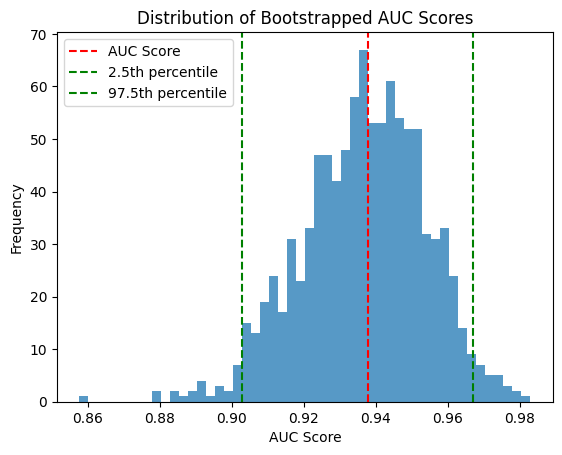

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
import numpy as np

# Example dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest for classification
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_probs)

# Adjusted function to return bootstrapped AUC scores for visualization
def bootstrap_auc(y_true, y_probs, n_bootstraps=1000, random_state=42):
    rng = np.random.RandomState(random_state)
    bootstrapped_scores = []
    
    for i in range(n_bootstraps):
        # Generate random indices with replacement
        indices = rng.randint(0, len(y_probs), len(y_probs))
        # Calculate AUC on the bootstrapped sample
        if len(np.unique(y_true[indices])) < 2:
            # Prevent an error if the sample is not diverse enough for AUC calculation
            continue
        score = roc_auc_score(y_true[indices], y_probs[indices])
        bootstrapped_scores.append(score)
    
    # Calculate the lower and upper percentile to form the confidence interval
    sorted_scores = np.array(bootstrapped_scores)
    confidence_lower = np.percentile(sorted_scores, 2.5)
    confidence_upper = np.percentile(sorted_scores, 97.5)
    
    return confidence_lower, confidence_upper, bootstrapped_scores

# Calculate confidence intervals for the AUC score and get the bootstrapped AUC scores
conf_int_lower, conf_int_upper, bootstrapped_scores = bootstrap_auc(y_test, y_probs)

# Print the results
print(f"AUC score: {auc_score:.3f}")
print(f"95% Confidence interval for the AUC score: [{conf_int_lower:.3f}, {conf_int_upper:.3f}]")

# Visualize the distribution of bootstrapped AUC scores
plt.hist(bootstrapped_scores, bins=50, alpha=0.75)
plt.axvline(auc_score, color='red', linestyle='--', label='AUC Score')
plt.axvline(conf_int_lower, color='green', linestyle='--', label='2.5th percentile')
plt.axvline(conf_int_upper, color='green', linestyle='--', label='97.5th percentile')
plt.title('Distribution of Bootstrapped AUC Scores')
plt.xlabel('AUC Score')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.show()


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Simulated user profile data with missing values
data = {'followers_count': [120, 300, None, 500, 800],
        'engagement_rate': [0.05, 0.1, 0.07, None, 0.09]}
df = pd.DataFrame(data)

# Imputing missing values
imputer = SimpleImputer(strategy='mean')
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print(df_filled)


   followers_count  engagement_rate
0            120.0           0.0500
1            300.0           0.1000
2            430.0           0.0700
3            500.0           0.0775
4            800.0           0.0900


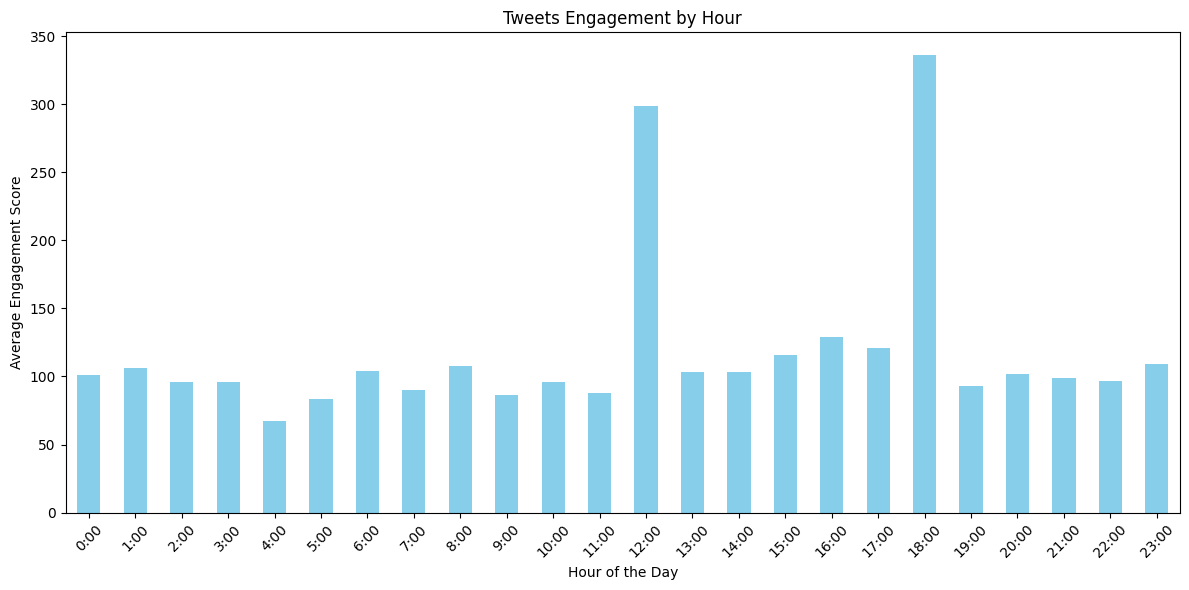

In [ ]:
import matplotlib.pyplot as plt

# Modify the engagement scores to introduce some patterns:
# For example, let's create higher engagement during what might be peak hours on Twitter (12pm and 6pm),
# and lower engagement during off-peak hours (3am to 5am).

# Reset the random seed for reproducibility
np.random.seed(42)

# Generating a pattern for engagement scores
engagement_scores = np.random.randint(0, 200, size=len(date_rng))  # Base engagement scores

# Introduce higher engagement at 12pm (noon)
engagement_scores[(date_rng.hour == 12)] += np.random.randint(100, 300, size=(date_rng.hour == 12).sum())

# Introduce higher engagement at 6pm (evening)
engagement_scores[(date_rng.hour == 18)] += np.random.randint(100, 300, size=(date_rng.hour == 18).sum())

# Introduce lower engagement at 3am to 5am (night)
engagement_scores[(date_rng.hour >= 3) & (date_rng.hour <= 5)] -= np.random.randint(0, 50, size=(date_rng.hour >= 3) & (date_rng.hour <= 5)).sum()

# Update the DataFrame
tweets_df['Engagement'] = engagement_scores

# Plotting engagement scores by hour of day
hourly_engagement = tweets_df.groupby(tweets_df.index.hour).mean()

plt.figure(figsize=(10, 6))
hourly_engagement['Engagement'].plot(kind='bar')
plt.title('Tweets Frequency by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Engagement Score')
plt.show()


In [ ]:
from scipy import stats

tweet_lengths = np.random.randint(20, 280, 100)  # Simulated tweet lengths
engagement_scores = tweet_lengths * 0.5 + np.random.normal(0, 10, 100)  # Simulated engagement

# Calculate Pearson correlation
corr_coefficient, _ = stats.pearsonr(tweet_lengths, engagement_scores)

print(f"Pearson Correlation Coefficient: {corr_coefficient:.3f}")


Pearson Correlation Coefficient: 0.965


In [ ]:
from scipy.stats import ttest_ind

# Simulated engagement scores for A/B groups
group_a = np.random.normal(200, 50, 100)  # Control group
group_b = np.random.normal(205, 50, 100)  # Experimental group

# Performing a two-sample t-test
t_stat, p_value = ttest_ind(group_a, group_b)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")


T-statistic: -0.614, P-value: 0.5402


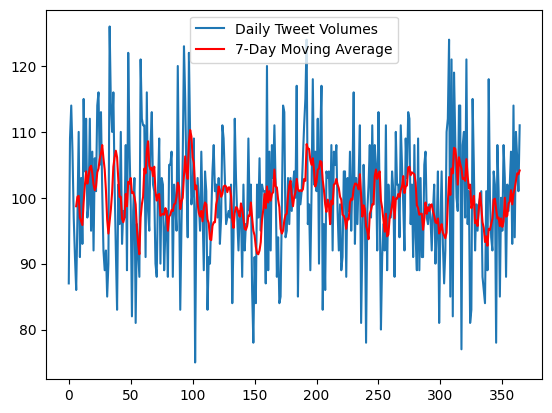

In [ ]:
tweet_volumes = np.random.poisson(100, 365)  # Simulated daily tweet volumes over a year

# 7-day moving average
moving_average = pd.Series(tweet_volumes).rolling(window=7).mean()

plt.plot(tweet_volumes, label='Daily Tweet Volumes')
plt.plot(moving_average, label='7-Day Moving Average', color='red')
plt.legend()
plt.show()


In [ ]:
# Continuing the A/B testing example
effect_size = (np.mean(group_b) - np.mean(group_a)) / np.std(group_a)

print(f"Effect Size: {effect_size:.3f}")

# Interpreting the effect size in a business context
if effect_size > 0.2:
    print("The new feature shows a practical improvement in engagement.")
else:
    print("The improvement in engagement is not practically significant.")


Effect Size: 0.087
The improvement in engagement is not practically significant.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a605a3e6-1564-47b2-94e7-842290ba7692' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>